# pytorch

This is my pytorch learning notebook.

Based on <https://pytorch.org/tutorials/beginner/basics/intro.html>

In [1]:
# verification installation

import torch

x = torch.rand(5, 3)
print(x)


tensor([[0.3688, 0.1860, 0.9257],
        [0.3305, 0.8618, 0.3924],
        [0.6505, 0.9448, 0.6661],
        [0.3952, 0.6352, 0.5433],
        [0.4057, 0.3221, 0.7392]])


In [18]:
# import 
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 基础数据结构

### Tensor

torch 里使用 tensor (张量) 作为模型的输入和输出编码


In [5]:
import numpy as np

data = [[1, 2], [3, 4], [5, 6]]

t = torch.tensor(data)

a = np.array(data)
t2 = torch.from_numpy(a)

print(t)
print(a)
print(t2)

t_ones = torch.ones_like(t, dtype=torch.float)
print(t_ones)

t_rand = torch.rand_like(t, dtype=torch.float)
print(t_rand)

print(t.dtype)
print(t.type())
print(t_rand.dtype)
print(t_rand.type())

t_float = torch.FloatTensor([1,2,3,4,5])
print(t_float.dtype)
print(t_float.type())

t_int = torch.IntTensor([1,2,3,4,5])
print(t_int.dtype)
print(t_int.type())

t_float2 = t_int.type(torch.float32)
print(t_float2.dtype)
print(t_float2.type())


tensor([[1, 2],
        [3, 4],
        [5, 6]])
[[1 2]
 [3 4]
 [5 6]]
tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0.7904, 0.3991],
        [0.7126, 0.7669],
        [0.6519, 0.2280]])
torch.int64
torch.LongTensor
torch.float32
torch.FloatTensor
torch.float32
torch.FloatTensor
torch.int32
torch.IntTensor
torch.float32
torch.FloatTensor


In [10]:
print(t.shape)
print(t.size())
print(t.ndim)
print(t.ndimension())

t2 = torch.tensor([0, 1,2,3,4,5])
print(t2.size())
print(t2.ndim)

t3 = t2.view(6, 1)
print(t3.size())
print(t3.ndim)

t4 = t2.view(-1, 1)
print(t4.size())
print(t4.ndim)

t5 = t2.view(3, -1)
print(t5.size())
print(t5.ndim)
print(t5.shape)


torch.Size([3, 2])
2
2
torch.Size([6])
1
torch.Size([6, 1])
2
torch.Size([6, 1])
2
torch.Size([3, 2])
2
torch.Size([3, 2])


In [12]:
s = np.array([1,2,3,4,5])
t = torch.from_numpy(s)
s_b = t.numpy()

print(s)
print(t)
print(s_b)

s[1] = 0
print(s)
print(t)
print(s_b)

t[1] = -1
print(s)
print(t)
print(s_b)

s_b[1] = -2
print(s)
print(t)
print(s_b)


[1 2 3 4 5]
tensor([1, 2, 3, 4, 5])
[1 2 3 4 5]
[1 0 3 4 5]
tensor([1, 0, 3, 4, 5])
[1 0 3 4 5]
[ 1 -1  3  4  5]
tensor([ 1, -1,  3,  4,  5])
[ 1 -1  3  4  5]
[ 1 -2  3  4  5]
tensor([ 1, -2,  3,  4,  5])
[ 1 -2  3  4  5]


In [23]:
u = torch.tensor([1,2])
v = torch.tensor([3,4])

# chaji
z = u * v
print(z)

y = torch.dot(u, v)
print(y)

y2 = u.dot(v)
print(y2)

# broadcast
z2 = z + 2
print(z2)

z2[:] = 0
print(z2)


tensor([3, 8])
tensor(11)
tensor(11)
tensor([ 5, 10])
tensor([0, 0])


tensor([-2.0000, -1.5556, -1.1111, -0.6667, -0.2222,  0.2222,  0.6667,  1.1111,
         1.5556,  2.0000])
tensor(-1.1921e-08)
tensor(2.)
tensor(-2.)


Matplotlib is building the font cache; this may take a moment.


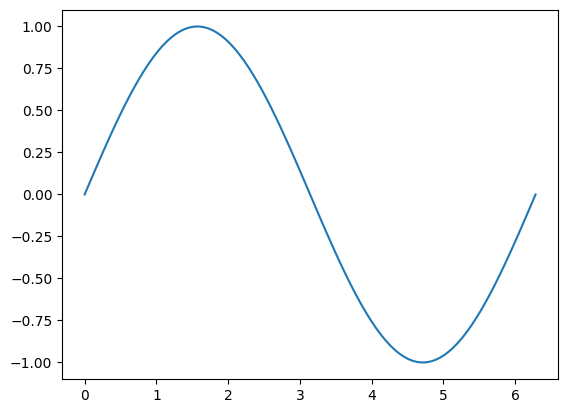

In [22]:
t = torch.linspace(-2, 2, steps=10, dtype=torch.float32)
print(t)

mean_t = t.mean()
print(mean_t)

max_t = t.max()
print(max_t)

min_t = t.min()
print(min_t)

x = torch.linspace(0, 2 * np.pi, steps=100)
y = torch.sin(x)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x.numpy(), y.numpy())
plt.show()


In [3]:
# 2D
A = torch.rand(3, 2)
print(A)
print(A.shape)
print(A.size())
print(A.ndim)
print(A.ndimension())
print(A.numel())
print()


B = torch.rand(2, 3)
print(B)
print(B.shape)
print(B.ndim)
print()

# torch.dot 只支持 1D 张量
C = torch.mm(A, B)
print(C)
print(C.shape)
print(C.ndim)

tensor([[0.9979, 0.7989],
        [0.2192, 0.1493],
        [0.2409, 0.8995]])
torch.Size([3, 2])
torch.Size([3, 2])
2
2
6

tensor([[0.0922, 0.1853, 0.3506],
        [0.1108, 0.2167, 0.0756]])
torch.Size([2, 3])
2

tensor([[0.1805, 0.3580, 0.4103],
        [0.0368, 0.0730, 0.0881],
        [0.1219, 0.2396, 0.1525]])
torch.Size([3, 3])
2


In [6]:
# slice notice
s = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33], [41, 42, 43]])
print(s)

# work
print(s[1:3, 0:2])

# not work：因为第一次 slice 返回了一个 3 * 3 张量，第二次 slice 取了新张量的行，而非原张量的列
print(s[1:3][0:2])


tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33],
        [41, 42, 43]])
tensor([[21, 22],
        [31, 32]])
tensor([[21, 22, 23],
        [31, 32, 33]])


tensor(3., requires_grad=True)
tensor(20., grad_fn=<AddBackward0>)
tensor(9.)
tensor(1024., grad_fn=<PowBackward1>)
tensor(1280.)
tensor(1419.5654)
tensor([0.0000, 0.1282, 0.2565, 0.3847, 0.5129, 0.6411, 0.7694, 0.8976, 1.0258,
        1.1541, 1.2823, 1.4105, 1.5387, 1.6670, 1.7952, 1.9234, 2.0517, 2.1799,
        2.3081, 2.4363, 2.5646, 2.6928, 2.8210, 2.9493, 3.0775, 3.2057, 3.3339,
        3.4622, 3.5904, 3.7186, 3.8468, 3.9751, 4.1033, 4.2315, 4.3598, 4.4880,
        4.6162, 4.7444, 4.8727, 5.0009, 5.1291, 5.2574, 5.3856, 5.5138, 5.6420,
        5.7703, 5.8985, 6.0267, 6.1550, 6.2832], requires_grad=True)
tensor([ 0.0000e+00,  1.2788e-01,  2.5365e-01,  3.7527e-01,  4.9072e-01,
         5.9811e-01,  6.9568e-01,  7.8183e-01,  8.5514e-01,  9.1441e-01,
         9.5867e-01,  9.8718e-01,  9.9949e-01,  9.9538e-01,  9.7493e-01,
         9.3847e-01,  8.8660e-01,  8.2017e-01,  7.4028e-01,  6.4823e-01,
         5.4553e-01,  4.3388e-01,  3.1511e-01,  1.9116e-01,  6.4070e-02,
        -6.4070e-0

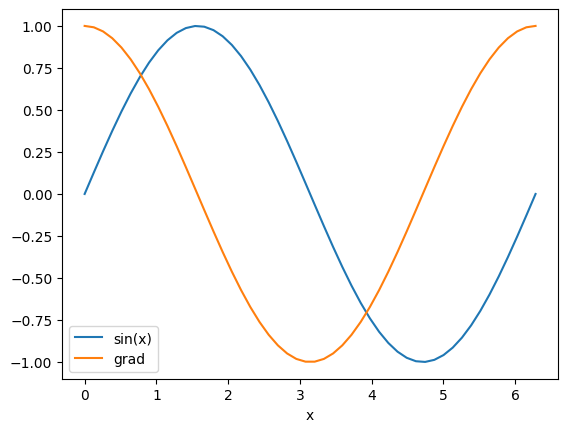

In [24]:
# derivative

x = torch.tensor(3.0, requires_grad=True)
print(x)

y = x ** 2 + 3 * x + 2
print(y)

y.backward()
print(x.grad)

u = torch.tensor(4., requires_grad=True)
v = torch.tensor(5., requires_grad=True)
z = u ** v
print(z)

z.backward()
print(u.grad)
print(v.grad)

# multiple values
x = torch.linspace(0, 2 * np.pi, steps=50, requires_grad=True)
Y = torch.sin(x)
y = torch.sum(Y)
print(x)
print(Y)
print(y)

y.backward()
print(x.grad)
plt.plot(x.detach().numpy(), Y.detach().numpy(), label='sin(x)')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='grad')
plt.xlabel('x')
plt.legend()
plt.show()


In [2]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using mps device


In [ ]:
# Load Data
# https://pytorch.org/vision/stable/datasets.html

training_data = datasets.FashionMNIST(

)